In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Reading in the csv file into a pandas dataframe.
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Task Two: Data Cleaning

In [3]:
#Checking columns in dataset
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Removing whitespaces, checking for nulll values and duplicates

Our column names contain leading whitespaces, so we remove those for data consistency. 

In [4]:
#To remove the leading white spaces in column names
df.columns = df.columns.str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
#To check if there any whitespaces within the elements in the dataframe
#Example, for the education column
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

There exists whitespaces in the dataframe's elements, so we eliminate those too

In [7]:
'''applymap() is used because it applies a function to every single element of the DataFrame.
The lambda function lambda x: x.strip() if isinstance(x, str) else x checks if the element is a string and applies strip() to remove whitespaces,
 else, x remains unchanged'''

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_12728\1064635692.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
df.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [9]:
#check for null values.
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There are no null values in our dataset.

In [10]:
#check for any duplicates
df.duplicated().sum()

0

There no duplicates in our dataset

# Converting categorical values into Numerical values

In [11]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Here, we assign numerical values to columns with categorical values(ie 'education','self_employed','loan_status') so that we can have variables into a format that the model can interpret, when we want to use the specific columns as predictors in our regression model

In [12]:
education={'Graduate':1,'Not Graduate':0}
df['education']=df['education'].apply(lambda x:education[x])
self_employed={'Yes':1,'No':0}
df['self_employed']=df['self_employed'].apply(lambda x:self_employed[x])
loan_status={'Approved':1,'Rejected':0}
df['loan_status']=df['loan_status'].apply(lambda x:loan_status[x])
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


# Drop columns

Here we drop columns that we will not particularly need in our regression model, and in this case we drop the 'loan_id' column since it serves same purpose as index

In [13]:
df.drop('loan_id',axis=1,inplace=True)

# Task 3
Building our Logistic Regression Model

In [14]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression


In [28]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [15]:
#Definition of the independent and dependent variables
X=df.drop('loan_status', axis=1)
y=df['loan_status']

In [16]:
#Splitting our dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=140)

In [17]:
#Standardization of dataset
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardizing these features (i.e., scaling them to have zero mean and unit variance) ensures that each feature contributes equally to the model's predictions and avoids bias towards features with larger scales.

In [18]:
#Listing values of scaled X_train
X_train_scaled

array([[ 0.87503556, -1.00941514, -1.01415642, ..., -0.28833485,
        -0.79094513, -0.25578491],
       [-0.88524693, -1.00941514,  0.98604119, ...,  0.87477423,
        -0.17698132,  0.1753883 ],
       [-0.2984861 , -1.00941514,  0.98604119, ...,  0.00814393,
        -0.49492687, -0.31738109],
       ...,
       [ 1.46179639, -1.00941514, -1.01415642, ...,  0.46426514,
         1.85129199,  1.37651369],
       [-0.88524693,  0.99067268,  0.98604119, ..., -0.58481364,
        -0.86769061, -0.40977535],
       [ 0.87503556, -1.00941514, -1.01415642, ..., -1.04093485,
        -1.44876351, -1.14892943]])

In [19]:
#Initializing and training the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
#Predicting the dependent variables on X_test 
predictions = logmodel.predict(X_test_scaled)

Here, we predict the target variable for the scaled test dataset (X_test_scaled),  using the trained logistic regression model (logmodel) which takes the features of the scaled test data (X_test_scaled) as input and returns the predicted labels based on the learned model.

# Tak 4: Model Evaluation

In [21]:
#Import classification library
from sklearn.metrics import classification_report

In [22]:
#Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       468
           1       0.95      0.94      0.94       813

    accuracy                           0.93      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.93      0.93      1281



This is our prediction model with a 93% accuracy score

Precision Score: For rejected loan_status our model predicted correctly 89% of the time and for approved loans, 95% of the times,it was correct. 

Recall: For rejected loan_status instances, 91% instances were correctly identified, while only 94% of approved loans_instances were correctly identified.

F1-score: For rejected loan_status, the F1-score is 0.90, and for approved lons it is 0.94.

In [23]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[426  42]
 [ 52 761]]


In our confusion matrix, the diagonal of the confusion matrix represents the correct predictions, while off-diagonal elements represent incorrect predictions. 
In our case:

426 instances were correctly classified as "Rejected".(True negatives).

42 instances were incorrectly classified as "Approved" when they were actually "Rejected"(False Positive)

52 instances were incorrectly classified as "Rejected" when they were actually "Approved".(False Negative)

761 instances were correctly classified as "Approved".(True Postive)

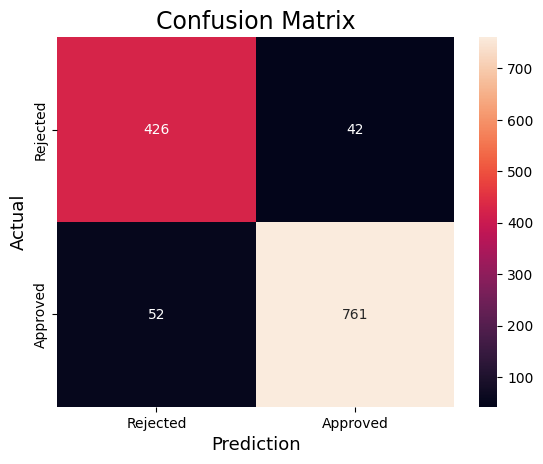

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, 
            annot=True  ,
            fmt='g', 
            xticklabels=['Rejected','Approved'],
            yticklabels=['Rejected','Approved'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

We can graghically represent the confusion matrix in a heatmap as such.
Cells with higher counts (lighter colors) indicate correct predictions.
Cells with lower counts (darker colors) indicate incorrect predictions.


Overall, the confusion matrix suggests that the model is performing reasonably well, with a higher number of correct predictions compared to incorrect ones.


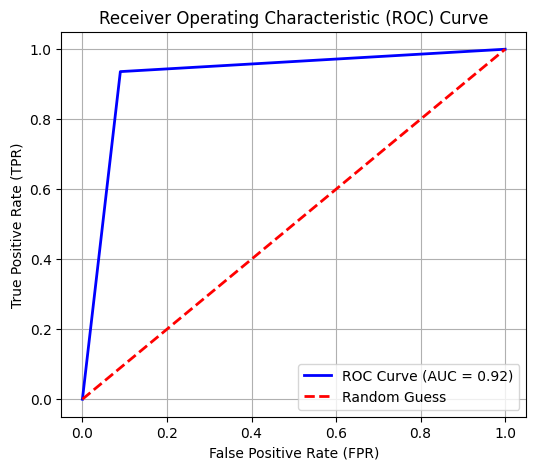

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
#compute the false positive rate(FPR) and true positives rate(TPR)


fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate AUC score
auc = roc_auc_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red',lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


AUC of 0.92 indicates the model has a high true positive rate and a low false positive rate across various threshold settings.

The ROC curve essentially, provides a visual representation of the model's ability to discriminate between positive and negative classes across different threshold settings. Our higher AUC value indicates better classification performance, indicating a highly reliable classification model that effectively separates positive and negative cases

# Task 5: Model Interpretability

In [26]:
# Getting the coefficients
coefficients = logmodel.coef_.flatten()

# Calculate coefficient magnitudes
coefficient_magnitudes = np.abs(coefficients)

# Print coefficient magnitudes
print(coefficient_magnitudes)

[0.01147266 0.07837035 0.00409622 1.77618107 1.23836085 0.77205346
 4.00521282 0.0965062  0.15748569 0.29180886 0.23592655]


The provided coefficients magnitudes in our logistic regression model represent the absolute strength of how each feature influences the log-odds of the target variable, ie loan_status. By comparing the magnitudes, we can see which features have a stronger influence on the model's predictions. For instance, the tenth feature (4.00521282), which directly translates to the column 'cibil_score' has the largest magnitude, indicating it has the strongest impact on the log-odds(rejected or approved) compared to other features

The smaller magnitude columns suggests a weaker influence on the log-odds.

# 

In [27]:
# Get the coefficients
coefficients =logmodel.coef_.flatten()

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)

# Display the odds ratios
print("Odds Ratios:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {odds_ratios[i]}")


Odds Ratios:
no_of_dependents: 0.9885928988150301
education: 1.0815231279886004
self_employed: 1.0041046240872082
income_annum: 0.16928339612910534
loan_amount: 3.4499538282269375
loan_term: 0.46206326643480733
cibil_score: 54.88350325860494
residential_assets_value: 1.1013164130642514
commercial_assets_value: 1.1705640091785585
luxury_assets_value: 1.338847089097932
bank_asset_value: 1.2660813190152331


With the odds ratio, we aim to compare the relative chance of events between groups. The interpretation considers the direction and magnitude of the OR. An OR greater than 1 suggests a positive association, while an OR less than 1 suggests a negative association.
In this case, we can interprete our findings as follows:

* no_of_dependents (0.988): A one-unit increase in the number of dependents leads to a slight decrease in the odds of loan approval by a factor of 0.988. This effect is very close to 1, suggesting a minimal impact.

* education (1.082): A one-unit increase in education level (measured categorically) leads to a slight increase in the odds of loan approval by a factor of 1.082. Again, the effect is close to 1, indicating a weak positive association.

* self_employed (1.004): Being self-employed (compared to being salaried) has a near-neutral effect on the odds of approval (OR very close to 1).

* income_annum (0.169): A one-unit increase in annual income leads to a significant decrease in the odds of loan approval by a factor of 0.169. This suggests higher income might be associated with a lower likelihood of needing a loan or not meeting other criteria.

* loan_amount (3.450): A one-unit increase in the loan amount leads to a significant increase in the odds of approval by a factor of 3.450. This is likely because larger loan amounts might require stricter approval criteria.

* loan_term (0.462): A one-unit increase in the loan term (likely measured in years) leads to a significant decrease in the odds of approval by a factor of 0.462. This suggests shorter loan terms might be viewed more favorably.

* cibil_score (54.884): A one-unit increase in the credit score leads to a very significant increase in the odds of loan approval by a factor of 54.884. This indicates a strong positive association between creditworthiness and loan approval.

* residential_assets_value (1.101): A one-unit increase in the residential asset value leads to a slight increase in the odds of approval by a factor of 1.101. This suggests owning a home might be a positive factor, but the effect is weak.

* commercial_assets_value (1.171): A one-unit increase in the commercial asset value leads to a slight increase in the odds of approval by a factor of 1.171. This effect is slightly stronger than residential assets but still relatively weak.

* luxury_assets_value (1.339): A one-unit increase in the luxury asset value leads to a moderate increase in the odds of approval by a factor of 1.339. This suggests owning luxury assets might be a somewhat positive factor.

# Conclusion

This logistic regression model aimed to predict loan approval decisions. The model achieved an accuracy of 0.93, indicating a strong ability to discriminate between loan applicants who will be approved or rejected.

Key Findings:

* The analysis revealed that the 'cibil_score' was the most influential factor in the model;Applicants with higher cibil_scores were more likely to be approved for loans. 

* Conversely, we also noted, applicants with higher income_annum displayed lower chances of approval.

* Odds ratio analysis further highlighted other neutral factors such as, number of dependents, employment and education status